# Trend Modeling

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

This is a tutorial for / demonstration of **Calculating and Modeling with Spatial Trends** with GeostatsPy. 

**YouTube Lecture**: check out my lectures on:
        
* [Trend Modeling](https://youtu.be/BCnivpSKF18?si=NwfnKoQsLFMk-zbx)
* [Kriging](https://youtu.be/CVkmuwF8cJ8?si=2J3pCcgRUuBUoepW)

For your convenience here's a summary of salient points.

#### Trend Modeling

Trend modeling is the modeling of local features, based on data and interpretation, that are deemed certain (known).  The trend is substracted from the data, leaving a residual that is modeled stochastically with uncertainty (treated as unknown).

* geostatistical spatial estimation methods will make an assumption concerning stationarity
    * in the presence of significant nonstationarity we can not rely on spatial estimates based on data + spatial continuity model
* if we observe a trend, we should model the trend.
    * then model the residuals stochastically

Steps: 

1. model trend consistent with data and intepretation at all locations within the area of itnerest, integrate all available information and expertise.

$$
m(\bf{u}_\beta), \, \forall \, \beta \in \, AOI
$$

2. substract trend from data at the $n$ data locations to formulate a residual at the data locations.

$$
y(\bf{u}_{\alpha}) = z(\bf{u}_{\alpha}) - m(\bf{u}_{\alpha}), \, \forall \, \alpha = 1, \ldots, n
$$

3. characterize the statistical behavoir of the residual $y(\bf{u}_{\alpha})$ integrating any information sources and interpretations.  For example the global cumulative distribution function and a measure of spatial continuity shown here.

$$
F_y(y) \quad \gamma_y(\bf{h})
$$

4. model the residual at all locations with $L$ multiple realizations.

$$
Y^\ell(\bf{u}_\beta),  \, \forall \, \beta \, \in \, AOI; \, \ell = 1, \ldots, L
$$

5. add the trend back in to the stochastic residual realizations to calculate the multiple realizations, $L$, of the property of interest based on the composite model of known deterministic trend, $m(\bf{u}_\alpha)$ and unknown stochastic residual, $y(\bf{u}_\alpha)$ 

$$
Z^\ell(\bf{u}_\beta) = Y^\ell(\bf{u}_\beta) + m(\bf{u}_\beta),  \, \forall \, \beta \in \, AOI; \, \ell = 1, \ldots, L
$$

6. check the model, including quantification of the proportion of variance treated as known (trend) and unknown (residual).

$$
\sigma^2_{Z} = \sigma^2_{Y} + \sigma^2_{m} + 2 \cdot C_{Y,m}
$$

given $C_{Y,m} \to 0$:

$$
\sigma^2_{Z} = \sigma^2_{Y} + \sigma^2_{m}
$$

I can now describe the proportion of variance allocated to known and unknown components as follows:

$$
Prop_{Known} = \frac{\sigma^2_{m}}{\sigma^2_{Y} + \sigma^2_{m}} \quad Prop_{Unknown} = \frac{\sigma^2_{Y}}{\sigma^2_{Y} + \sigma^2_{m}}
$$

I provide some practical, data-driven methods for trend model, but I should indicate that:

1. trend modeling is very important in reservoir modeling as it has large impact on local model accuracy and on the undertainty model
2. trend modeling is used in almost every subsurface model, unless the data is dense enough to impose local trends
3. trend modeling includes a high degree of expert judgement combined with the integration of various information sources

#### Spatial Estimation

Consider the case of making an estimate at some unsampled location, $𝑧(\bf{u}_0)$, where $z$ is the property of interest (e.g. porosity etc.) and $𝐮_0$ is a location vector describing the unsampled location.

How would you do this given data, $𝑧(\bf{𝐮}_1)$, $𝑧(\bf{𝐮}_2)$, and $𝑧(\bf{𝐮}_3)$?

It would be natural to use a set of linear weights to formulate the estimator given the available data.

$$
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha})
$$

We could add an unbiasedness constraint to impose the sum of the weights equal to one.  What we will do is assign the remainder of the weight (one minus the sum of weights) to the global average; therefore, if we have no informative data we will estimate with the global average of the property of interest.

$$
z^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} z(\bf{u}_{\alpha}) + \left(1-\sum^{n}_{\alpha = 1} \lambda_{\alpha} \right) \overline{z}
$$

We will make a stationarity assumption, so let's assume that we are working with residuals, $y$. 

$$
y^{*}(\bf{u}) = z^{*}(\bf{u}) - \overline{z}(\bf{u})
$$

If we substitute this form into our estimator the estimator simplifies, since the mean of the residual is zero.

$$
y^{*}(\bf{u}) = \sum^{n}_{\alpha = 1} \lambda_{\alpha} y(\bf{u}_{\alpha})
$$

while satisfying the unbaisedness constraint.  

#### Kriging

Now the next question is what weights should we use?  

We could use equal weighting, $\lambda = \frac{1}{n}$, and the estimator would be the average of the local data applied for the spatial estimate. This would not be very informative.

We could assign weights considering the spatial context of the data and the estimate:

* **spatial continuity** as quantified by the variogram (and covariance function)
* **redundancy** the degree of spatial continuity between all of the available data with themselves 
* **closeness** the degree of spatial continuity between the avaiable data and the estimation location

The kriging approach accomplishes this, calculating the best linear unbiased weights for the local data to estimate at the unknown location.  The derivation of the kriging system and the resulting linear set of equations is available in the lecture notes.  Furthermore kriging provides a measure of the accuracy of the estimate!  This is the kriging estimation variance (sometimes just called the kriging variance).

$$
\sigma^{2}_{E}(\bf{u}) = C(0) - \sum^{n}_{\alpha = 1} \lambda_{\alpha} C(\bf{u}_0 - \bf{u}_{\alpha})
$$

What is 'best' about this estimate? Kriging estimates are best in that they minimize the above estimation variance. 

#### Properties of Kriging

Here are some important properties of kriging:

* **Exact interpolator** - kriging estimates with the data values at the data locations
* **Kriging variance** can be calculated before getting the sample information, as the kriging estimation variance is not dependent on the values of the data nor the kriging estimate, i.e. the kriging estimator is homoscedastic. 
* **Spatial context** - kriging takes into account, furthermore to the statements on spatial continuity, closeness and redundancy we can state that kriging accounts for the configuration of the data and structural continuity of the variable being estimated.
* **Scale** - kriging may be generalized to account for the support volume of the data and estimate. We will cover this later.
* **Multivariate** - kriging may be generalized to account for multiple secondary data in the spatial estimate with the cokriging system. We will cover this later.
* **Smoothing effect** of kriging can be forecast. We will use this to build stochastic simulations later.

We limit ourselves to simple data-driven methods, but acknowledge much more is needed. In fact, trend modeling requires a high degree of knowledge concerning local geoscience and engineering, data and physics.  

#### Load the required libraries

The following code loads the required libraries.

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))  

GeostatsPy version: 0.0.71


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # supress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrys for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import astropy.convolution.convolve as convolve               # sparse data convolution
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

#### Define Functions

This is a convenience function to add major and minor gridlines to improve plot interpretability.

* scipy's Gaussian kernel maker was offline, so I made a new function for fun

In [3]:
def make_Gaussian_kernel(sigma,nc,csiz):                      # Gaussian kernel maker
    kernel = np.zeros((nc,nc))                                 
    for iy in range(0,nc):
        y = (iy - 100)*csiz
        for ix in range(0,nc):
            x = (ix - 100)*csiz
            kernel[iy,ix] = math.exp(-1*(y**2+x**2)/(2*sigma**2))/(2*math.pi*sigma**2)
    kernel = kernel/np.sum(kernel.flatten())                  # normalize the kernel to sum to 1.0 to prevent bias  
    return kernel

def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

* note, I often remove unnecessary data table columns. This clarifies workflows and reduces the chance of blunders, e.g., using the wrong column!

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_MV_biased.csv") # load the data from Dr. Pyrcz's GitHub repository
df = df[['X','Y','Porosity']]                                   # remove the unneeded features, columns
df.head(n=3)                                                    # preview the DataFrame

,X,Y,Porosity
0,100.0,900.0,0.101319
1,100.0,800.0,0.147676
2,100.0,700.0,0.145912


#### Summary Statistics

Let's look at summary statistics.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,368.0,499.565217,289.770794,0.000000,240.000000,500.000000,762.500000,990.000000
Y,368.0,520.644022,277.412187,9.000000,269.000000,539.000000,769.000000,999.000000
Porosity,368.0,0.127026,0.030642,0.041122,0.103412,0.125842,0.148623,0.210258


##### Specify the Grid

Let's specify a reasonable grid to the estimation map.

* we balance detail and computation time. Note kriging computation complexity scales $O(n_{cell})$

* so if we half the cell size we have 4 times more grid cells in 2D, 4 times the runtime

In [7]:
xmin = 0.0; xmax = 1000.0                                     # range of x values
ymin = 0.0; ymax = 1000.0                                     # range of y values

xsiz = 10; ysiz = 10                                          # cell size
nx = 100; ny = 100                                            # number of cells
xmn = 5; ymn = 5                                              # grid origin, location center of lower left cell

pormin = 0.05; pormax = 0.22                                  # set feature min and max for colorbars

##### Location Maps

Let's plot the location maps of porosity data.

In [8]:
GSLIB.locmap                                                  # GeostatsPy's location map function

<function geostatspy.GSLIB.locmap(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, vmin, vmax, title, xlabel, ylabel, vlabel, cmap, fig_name)>

Now we can populate the plotting parameters and visualize the porosity data.

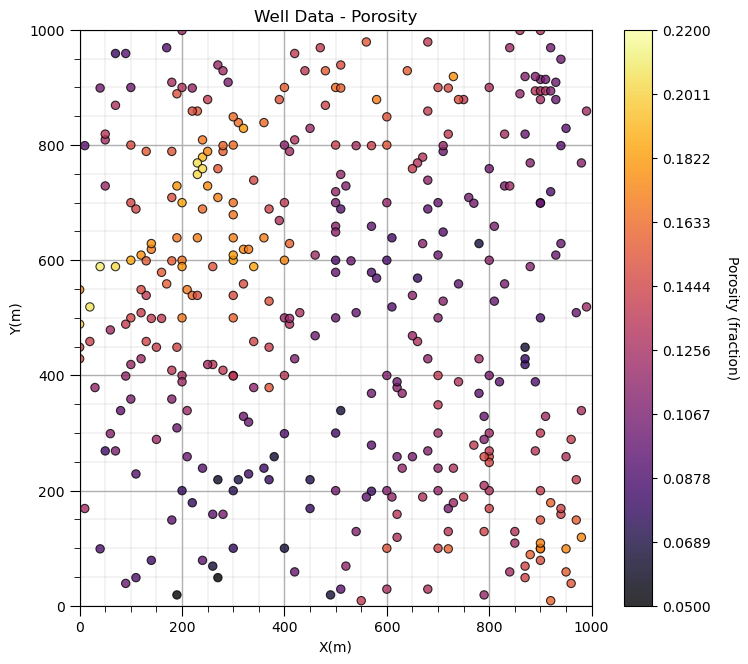

In [9]:
plt.subplot(111)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2); add_grid(); plt.show()

#### Declustering Spatial Data

Let's get some declustering weights. For more information see the demonstration on declustering.

In [10]:
wts, cell_sizes, dmeans = geostats.declus(df,'X','Y','Porosity',iminmax = 1, noff= 10, ncell=100,cmin=10,cmax=2000)
df['Wts'] = wts                                               # add weights to the sample data DataFrame
df.head()                                                     # preview to check the sample data DataFrame

There are 368 data with:
   mean of      0.12702581678766817 
   min and max  0.0411215184025049 and 0.2102576261742328
   standard dev 0.03060060557902899 


,X,Y,Porosity,Wts
0,100.0,900.0,0.101319,1.053701
1,100.0,800.0,0.147676,1.165625
2,100.0,700.0,0.145912,1.203734
3,100.0,600.0,0.186167,0.694636
4,100.0,500.0,0.146088,0.488570


#### Trend by Convolution / Local Window Average

Let's attempt a convolution-based trend model, this is a moving window average of the local data.

* We have a convenience function that takes data with X and Y locations in a DataFrame and makes a sparse 2D array.  

* All cells without a data value are assigned to NumPy's NaN (null values, missing value). Let's see the inputs for this command.

In [11]:
GSLIB.DataFrame2ndarray                                       # GeostatsPy's data points to ndarray function

<function geostatspy.GSLIB.DataFrame2ndarray(df, xcol, ycol, vcol, xmin, xmax, ymin, ymax, step)>

Let's make an sparse array with the appropriate parameters. 

* The reason we are doing this is that convolution programs in general work with ndarrays and not with point data in DataFrames.

In [12]:
por_grid = GSLIB.DataFrame2ndarray(df,'X','Y','Porosity',xmin, xmax, ymin, ymax, xsiz) # data points to ndarray

We have a ndarray (por_grid) with the data assigned to grid cells. Now we need a kernel. 

* The kernel represents the weights within the moving window. If we use constant weight over the kernel the resulting trend model will likely have discontinuities. 

* A Gaussian kernel (weights highest in the middle of the window and decreasing to 0,0 at the edge) is useful to calculate a smooth trend model. 

* We can use the SciPy package's signal functions for the Gaussian kernel. Note, current scipy has a bug with their signal.gaussin function so I wrote one below.

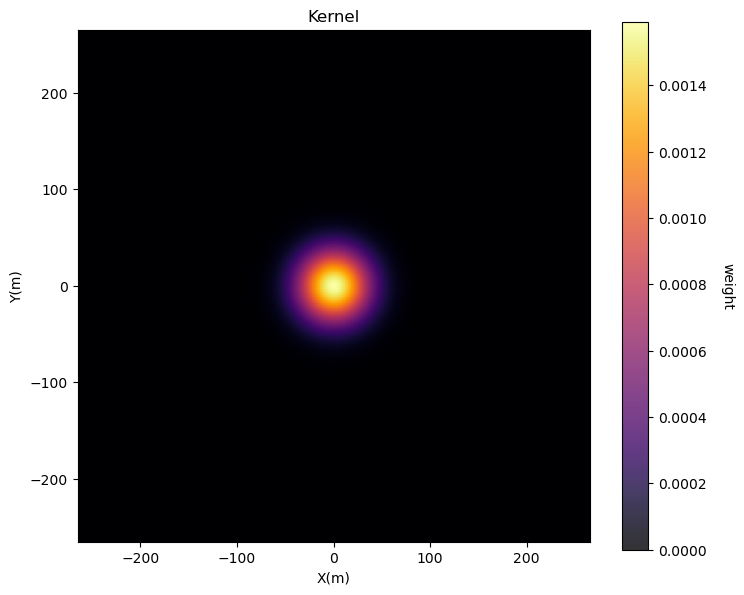

In [13]:
sigma = 100; nc = 201                                          # radius of Gaussian function, size of kernel
kernel = make_Gaussian_kernel(sigma = sigma,nc = nc,csiz = xsiz)
kmax = np.max(kernel.flatten())                                # calculate the kernel maximum for plotting

plt.subplot(111)
GSLIB.pixelplt_st(kernel,xmin=-265,xmax=265,ymin=-265,ymax=265,step=10,vmin=0,vmax=kmax,title='Kernel',xlabel='X(m)',ylabel='Y(m)',vlabel='weight',cmap=cmap)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

Now we need to convolve our sparse data assigned to a ndarray with our Gaussian kernel. 

* There are many functions available for convolution. But we have a problem as we want to apply our Gaussian kernel to a sparse ndarray full of missing values. 

* It turns out this is a common issue for our friends in Astronomy and so their Astropy package has a convolution method that will work well. I figured out the following (so you don't have to!).

In [14]:
porosity_trend = convolve(por_grid,kernel,boundary='extend',nan_treatment='interpolate',normalize_kernel=True) # convolve

No errors? It worked? Let's look at the results. We can plot and compare the original porosity data and the resulting trend to check for consistency.

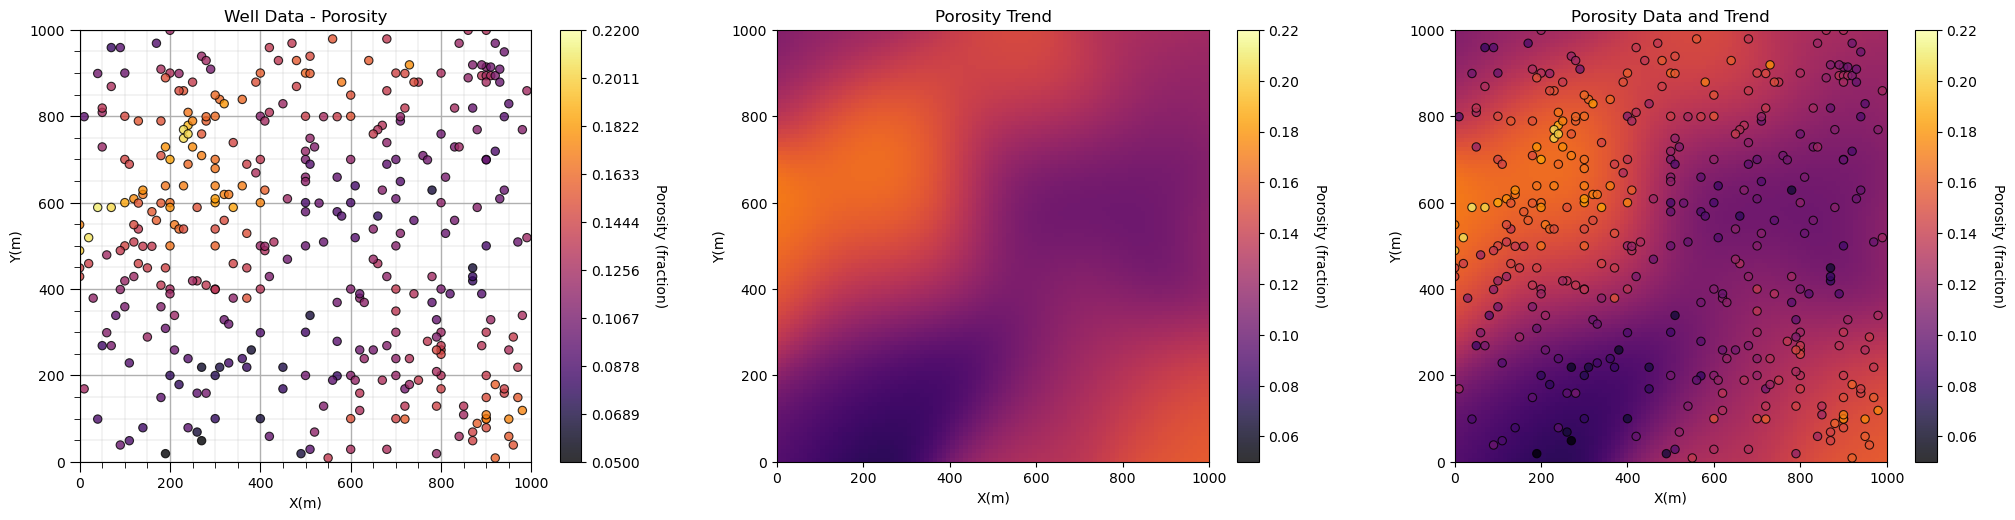

In [15]:
plt.subplot(131)                                               # location map of the data for comparison
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)
add_grid()

plt.subplot(132)                                               # convolution trend model
GSLIB.pixelplt_st(porosity_trend,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,'Porosity Trend','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(133)                                               # data and trend model
GSLIB.locpix_st(porosity_trend,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Data and Trend','X(m)','Y(m)','Porosity (fraciton)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=0.9, wspace=0.2, hspace=0.2); plt.show()

#### Other Methods for Trend Calculation

There are a variety of other methods for trend calculation. I will just mention them here.

1. hand-drawn, expert interpretation - many 3D modeling packages allow for experts to draw trends and allow for fast interpolation to build an exhaustive trend model.
2. kriging - kriging provides best linear unbiased estimates between data given a spatial continuity model (more on this when we cover spatial estimation).  One note of caution is that kriging is exact; therefore it will over fit unless it is use with averaged data values (e.g. over the vertical) or with a block kriging option (kriging at a volume support larger than the data).
3. regression - fit a function as a function of X, Y coordinates. This could be extended to more complicated prediction models from machine learning.

#### Trend Diagnotistics

Let's go back to the convolution trend and check it (to demonstrate the method of trend checking). Note, I haven't tried to perfect the result. I'm just demonstrating the method. 

In addition to the previous visualization, let's look at the distributions and summary statistics of the original declustered porosity data and the trend.

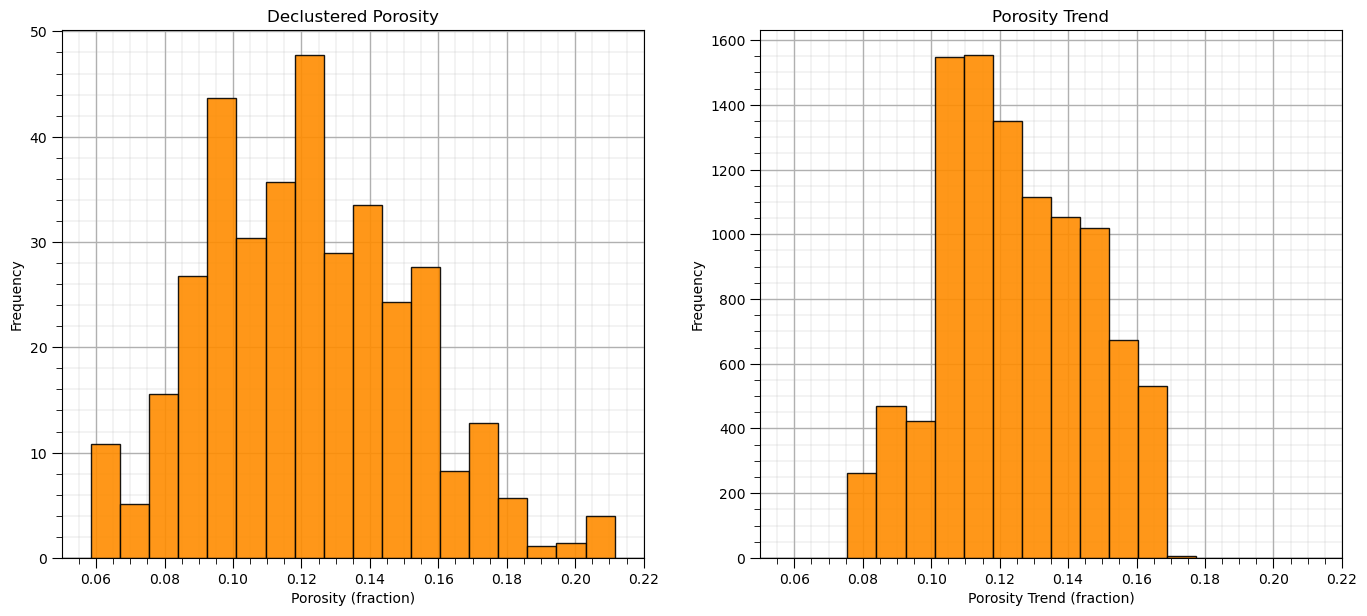

In [16]:
plt.subplot(121)                                               # declustered data histogram
GSLIB.hist_st(df['Porosity'],pormin,pormax,False,False,20,df['Wts'],'Porosity (fraction)','Declustered Porosity')
add_grid()

plt.subplot(122)                                               # trend histogram
GSLIB.hist_st(porosity_trend.flatten(),pormin,pormax,False,False,20,None,'Porosity Trend (fraction)','Porosity Trend')
add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

We can also look at the summary statistics. Here's a function that calculates the weighted standard deviation (and the average). We can use this with the data and declustering weights and figure out the allocation of variance between the trend and the residual.  

In [17]:
# Weighted average and standard deviation
def weighted_avg_and_std(values, weights):                         # weighted stats from Eric O Lebigot, stack overflow
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

wavg_por,wstd_por = weighted_avg_and_std(df['Porosity'],df['Wts']) 

wavg_por_trend = np.average(porosity_trend)
wstd_por_trend = np.std(porosity_trend)

print('Niave Porosity Data: Average ' + str(round(np.average(df['Porosity']),4)) + ', Var ' + str(round(np.var(df['Porosity']),5)))
print('Declustered Porosity Data: Average ' + str(round(wavg_por,4)) + ', Var ' + str(round(wstd_por**2,5)))
print('Porosity Trend: Average            ' + str(round(wavg_por_trend,4)) + ', Var ' + str(round(wstd_por_trend**2,5)))
print('Proportion Trend / Known:          ' + str(round(wstd_por_trend**2/(wstd_por**2),3)))
print('Proportion Residual / Unknown:     ' + str(round((wstd_por**2 - wstd_por_trend**2)/(wstd_por**2),3)))

Niave Porosity Data: Average 0.127, Var 0.00094
Declustered Porosity Data: Average 0.1207, Var 0.00093
Porosity Trend: Average            0.1244, Var 0.00045
Proportion Trend / Known:          0.484
Proportion Residual / Unknown:     0.516


 Check out the proportion of variance in the trend and residual.   

#### Adding Trend to DataFrame

Let's add the porosity trend to our DataFrame. 

* We have a sample program in GeostatsPy that takes a 2D ndarray and extracts the values at the data locations and adds them as a new column in the DataFrame.  

* Then we can do a little math to calculate and add the porosity residual also and visualize this all together as a final check.

In [18]:
df = GSLIB.sample(porosity_trend,xmin,ymin,xsiz,"Por_Trend",df,'X','Y') # add the trend values to the DataFrame
df['Por_Res'] = df['Porosity'] - df['Por_Trend']               # calculate the residual and add to DataFrame

Let's check out the DataFrame and confirm that we have everything now. We will need trend and residual in our DataFrame to support all subsequent modeling steps.

In [19]:
df.head()

,X,Y,Porosity,Wts,Por_Trend,Por_Res
0,100.0,900.0,0.101319,1.053701,0.127816,-0.026497
1,100.0,800.0,0.147676,1.165625,0.145671,0.002005
2,100.0,700.0,0.145912,1.203734,0.160377,-0.014465
3,100.0,600.0,0.186167,0.694636,0.163702,0.022464
4,100.0,500.0,0.146088,0.488570,0.156281,-0.010193


#### Check for Conditional Bias in the Trend Model

Conditional bias is systematic under or overestimation over specific ranges of the trend or actual feature values.

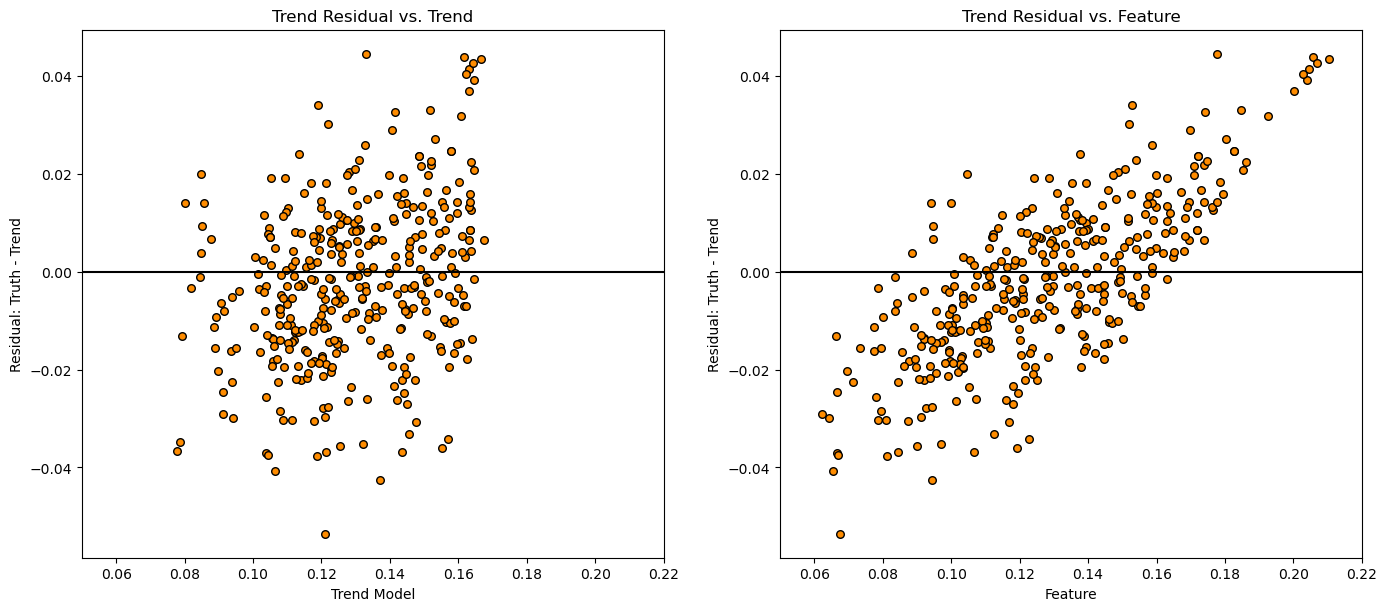

In [20]:
plt.subplot(121)
plt.scatter(df['Por_Trend'],df['Por_Res'],color='darkorange',s=30,edgecolor='black')
plt.xlabel('Trend Model'); plt.ylabel('Residual: Truth - Trend'); plt.title('Trend Residual vs. Trend')
plt.plot([pormin,pormax],[0,0],color='black'); plt.xlim([pormin,pormax])

plt.subplot(122)
plt.scatter(df['Porosity'],df['Por_Res'],color='darkorange',s=30,edgecolor='black')
plt.xlabel('Feature'); plt.ylabel('Residual: Truth - Trend'); plt.title('Trend Residual vs. Feature')
plt.plot([pormin,pormax],[0,0],color='black'); plt.xlim([pormin,pormax])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

Check to see if we are over estimating low values and underestimating high values, this indicates trend underfit.

#### Location Maps, Feature, Trend and Residual

Let's look at where the trend is too low and too high.

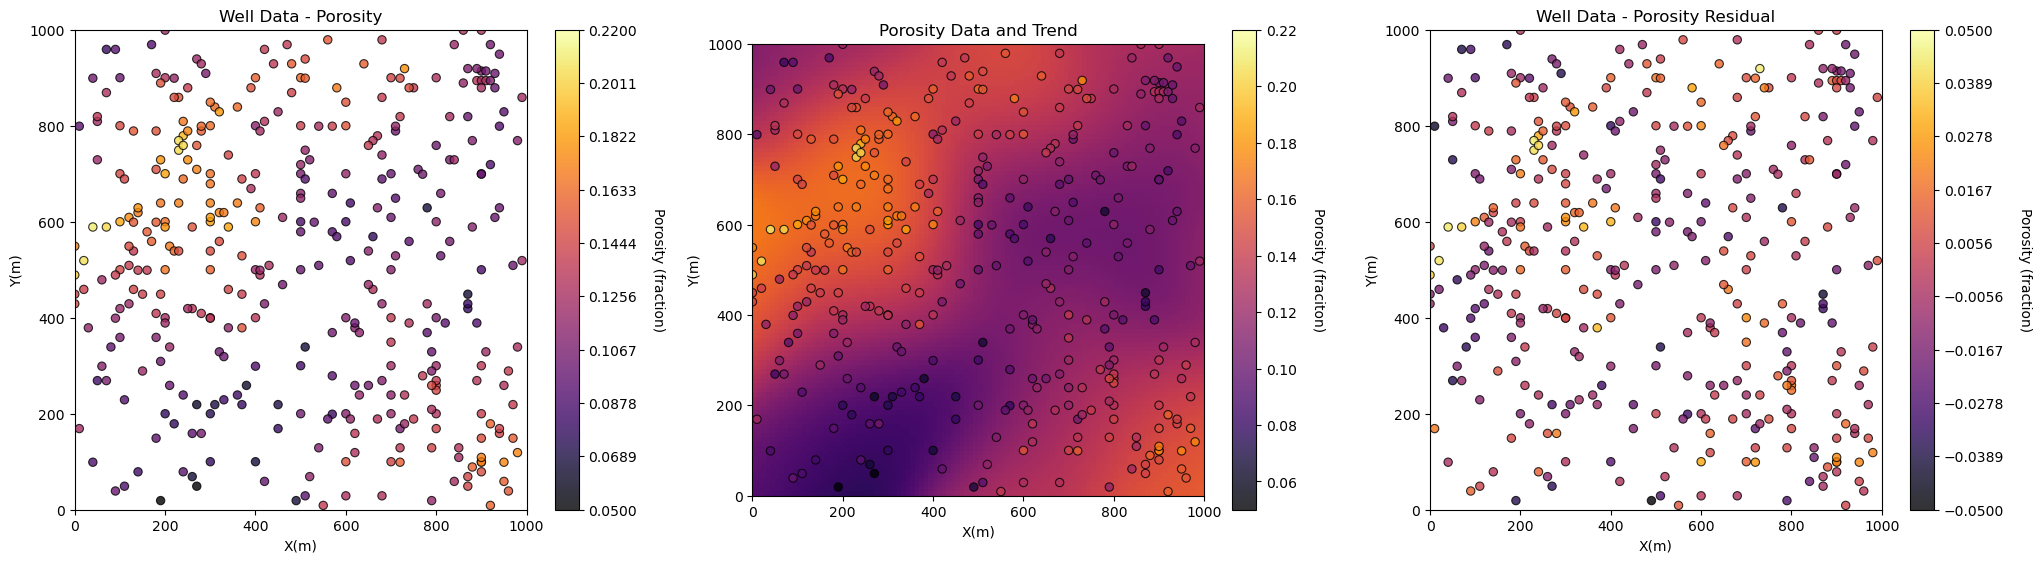

In [21]:
plt.subplot(131)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(132)
GSLIB.locpix_st(porosity_trend,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Data and Trend','X(m)','Y(m)','Porosity (fraciton)',cmap)

plt.subplot(133)
GSLIB.locmap_st(df,'X','Y','Por_Res',xmin,xmax,ymin,ymax,-0.05,0.05,'Well Data - Porosity Residual','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Does it look correct? 

* a strong degree of consistency between the porosity data and trend

* the porosity residual no longer has a trend, it has been detrended

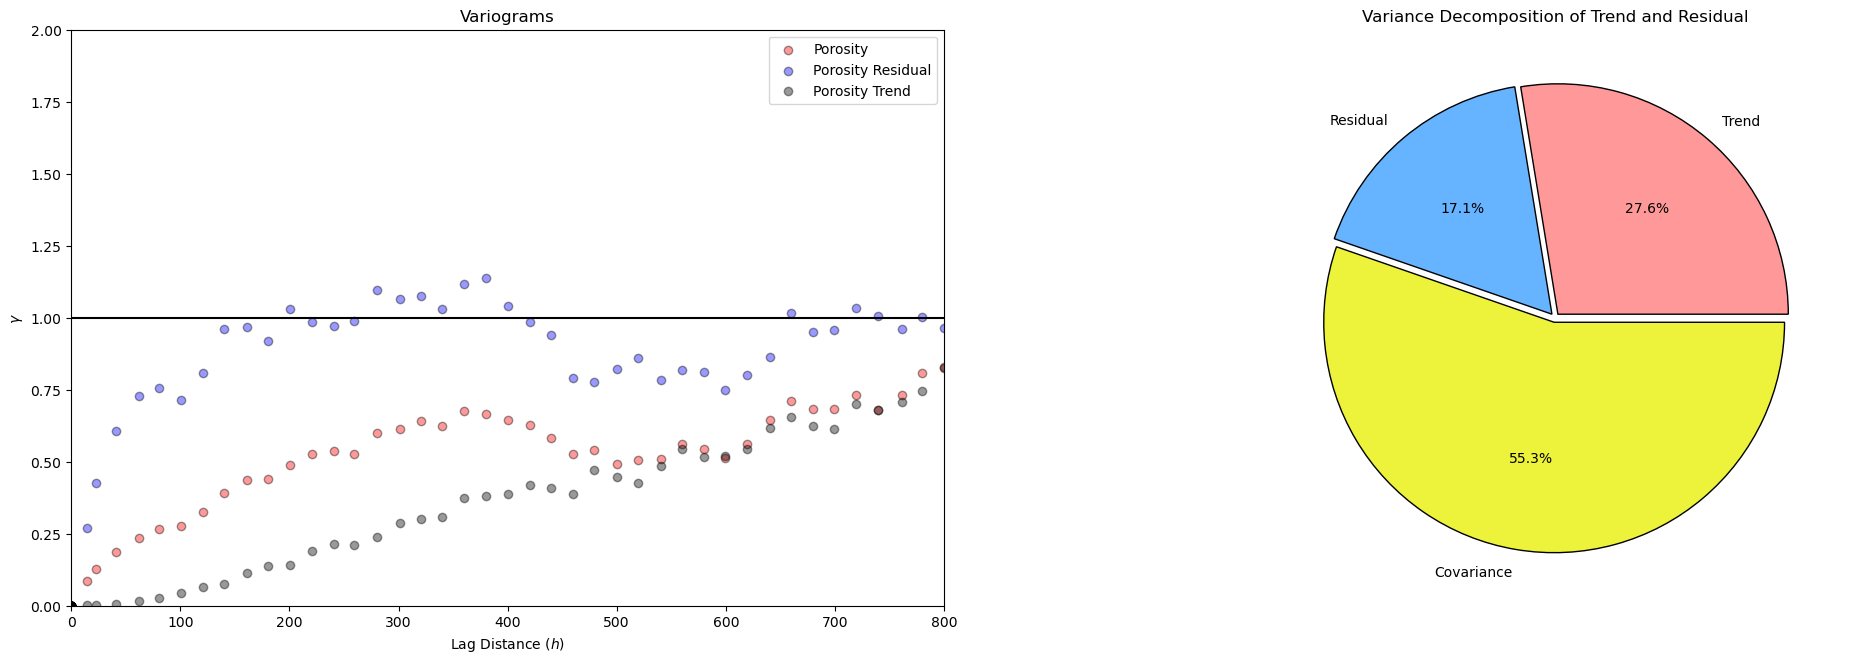

In [22]:
plt.subplot(121)
lags,var,pairs = geostats.gamv(df,'X','Y','Porosity',-999,999,20,15,100,45.0,22.5,9999,1)
plt.scatter(lags,var,color='red',edgecolor='black',alpha=0.4,label='Porosity'); 
lags,var,pairs = geostats.gamv(df,'X','Y','Por_Res',-999,999,20,15,100,45.0,22.5,9999,1)
plt.scatter(lags,var,color='blue',edgecolor='black',alpha=0.4,label='Porosity Residual');
lags,var,pairs = geostats.gamv(df,'X','Y','Por_Trend',-999,999,20,15,100,45.0,22.5,9999,1)
plt.scatter(lags,var,color='black',edgecolor='black',alpha=0.4,label='Porosity Trend');
plt.plot([0,1500],[1.0,1.0],color='black'); plt.xlim([0,800]); plt.ylim([0,2.0]); plt.xlabel('Lag Distance ($h$)'); plt.ylabel('$\gamma$')
plt.legend(loc='upper right'); plt.title('Variograms')

var_trend = np.var(df['Por_Trend']); var_resid = np.var(df['Por_Res']); cov_tr = np.cov(df['Por_Trend'],df['Por_Res'])[0,0]
var_total = var_trend + var_resid + 2* cov_tr

ptrend = var_trend / var_total; presid = var_resid / var_total; pcov = 2*cov_tr / var_total

plt.subplot(122)                                      # results from the coin tosses 
plt.pie([ptrend, presid, pcov],labels = ['Trend','Residual', 'Covariance'],radius = 1, autopct='%1.1f%%', colors = ['#ff9999','#66b3ff','#edf23a'], explode = [.02,.02,0.02], wedgeprops = {"edgecolor":"k",'linewidth': 1}  )
plt.title('Variance Decomposition of Trend and Residual')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Experiment with Different Trend Models

Here's a more compact workflow for exploration.

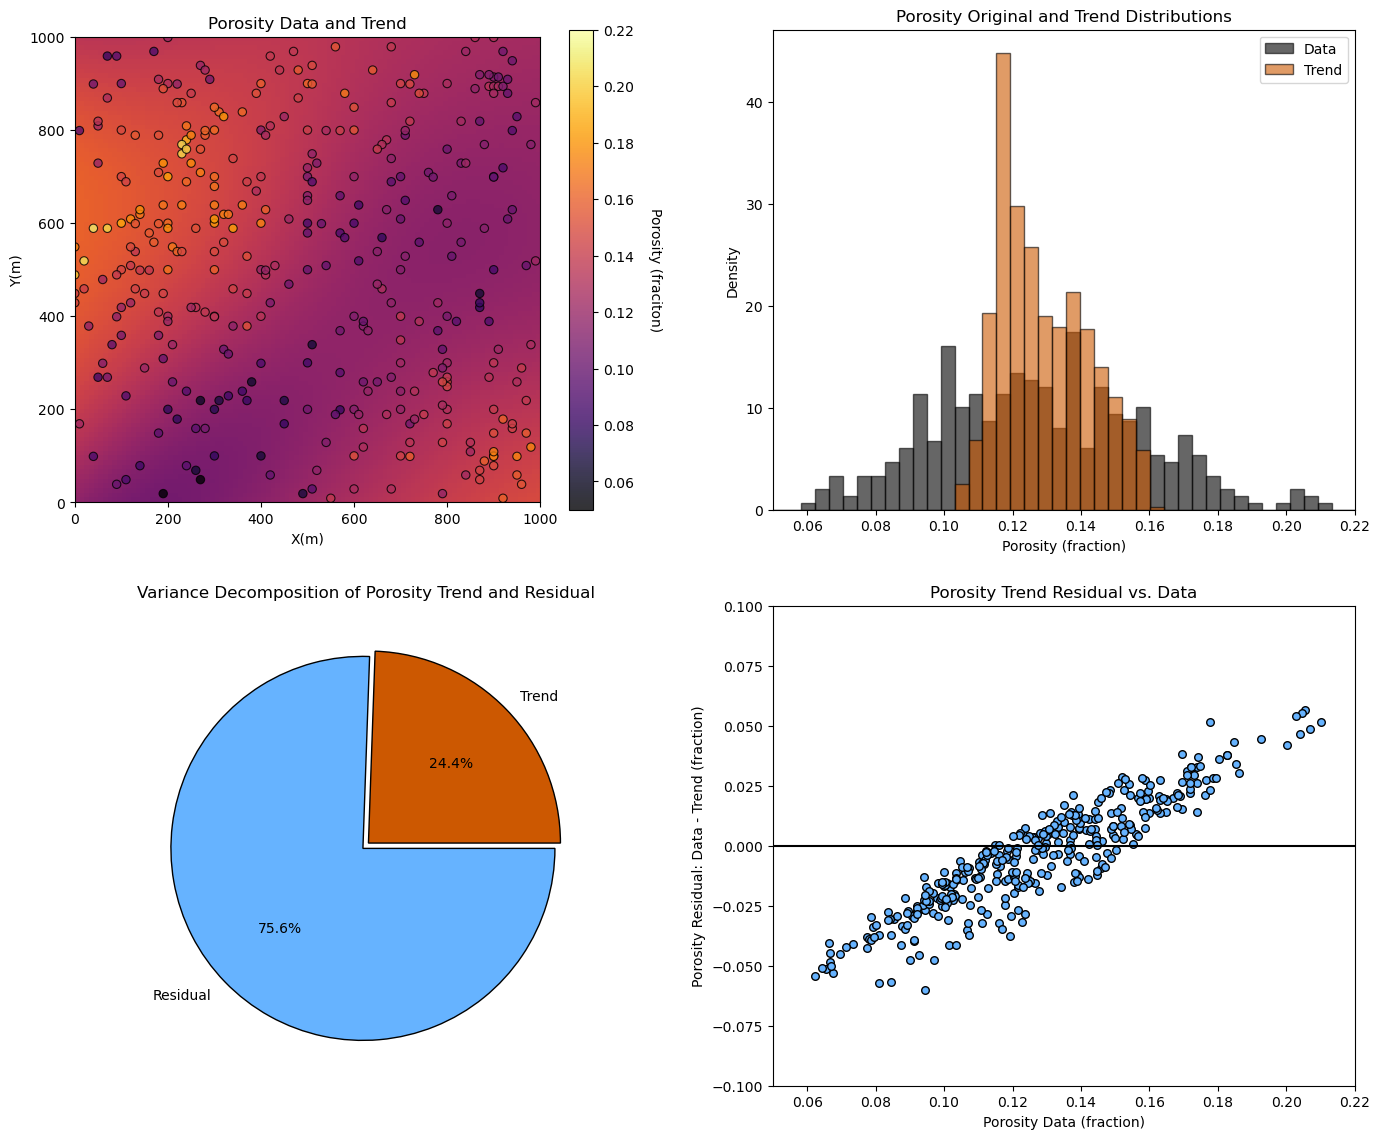

In [23]:
sigma = 200; nc = 201                                          # radius of Gaussian function, size of kernel

kernel = make_Gaussian_kernel(sigma = sigma,nc = nc,csiz = xsiz)
porosity_trend = convolve(por_grid,kernel,boundary='extend',nan_treatment='interpolate',normalize_kernel=True)
df = GSLIB.sample(porosity_trend,xmin,ymin,xsiz,"Por_Trend",df,'X','Y')
df['Por_Res'] = df['Porosity'] - df['Por_Trend'] # calculate the residual and add to DataFrame
var_trend = np.var(df['Por_Trend']); var_resid = np.var(df['Por_Res']);
ptrend = var_trend / (var_trend+var_resid); presid = var_resid / (var_trend+var_resid)

plt.subplot(221)
GSLIB.locpix_st(porosity_trend,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Data and Trend','X(m)','Y(m)','Porosity (fraciton)',cmap=plt.cm.inferno)

plt.subplot(222)
plt.hist(df['Porosity'],bins = np.linspace(0.05,0.25),edgecolor='black',color='black',alpha=0.6,density=True,label='Data'); plt.xlim([pormin,pormax])
plt.hist(porosity_trend.flatten(),bins = np.linspace(0.05,0.25),edgecolor='black',color='#CC5801',alpha=0.6,density=True,label='Trend'); plt.xlabel('Porosity (fraction)'); plt.ylabel('Density'); plt.title('Porosity Original and Trend Distributions')
plt.legend(loc='upper right')

plt.subplot(223)                                      # results from the coin tosses 
plt.pie([ptrend, presid],labels = ['Trend','Residual'],radius = 1, autopct='%1.1f%%', colors = ['#CC5801','#66b3ff'], explode = [.02,.02], wedgeprops = {"edgecolor":"k",'linewidth': 1}  )
plt.title('Variance Decomposition of Porosity Trend and Residual')

plt.subplot(224)
plt.scatter(df['Porosity'],df['Por_Res'],color='#66b3ff',s=30,edgecolor='black')
plt.xlabel('Porosity Data (fraction)'); plt.ylabel('Porosity Residual: Data - Trend (fraction)'); plt.title('Porosity Trend Residual vs. Data')
plt.plot([pormin,pormax],[0,0],color='black'); plt.xlim([pormin,pormax]); plt.ylim([-0.1,0.1])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.2)
plt.show()

#### Full Trend and Residual Workflow 

Now let's finish a model with deterministic trend (convolution kernel) and kriged residual.

* for brevity we will assume a reasonable isotropic variogram model, instead of calculating the directional variograms of the residual

In [24]:
%%capture --no-display     

ktype = 0                                  # kriging type, 0 - simple, 1 - ordinary
radius = 300                               # search radius for neighbouring data
nxdis = 1; nydis = 1                       # number of grid discretizations for block kriging (not tested)
ndmin = 0; ndmax = 40                      # minimum and maximum data for an estimate
tmin = -99999.9; tmax = 99999.9                                 # minimum property value
res_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=var_resid,azi1=45,hmaj1=200,hmin1=200) # porosity variogram

res_kmap, res_vmap = geostats.kb2d(df,'X','Y','Por_Res',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,0.0,res_vario)

por_model = porosity_trend + res_kmap

Now let's visualize the workflows steps.

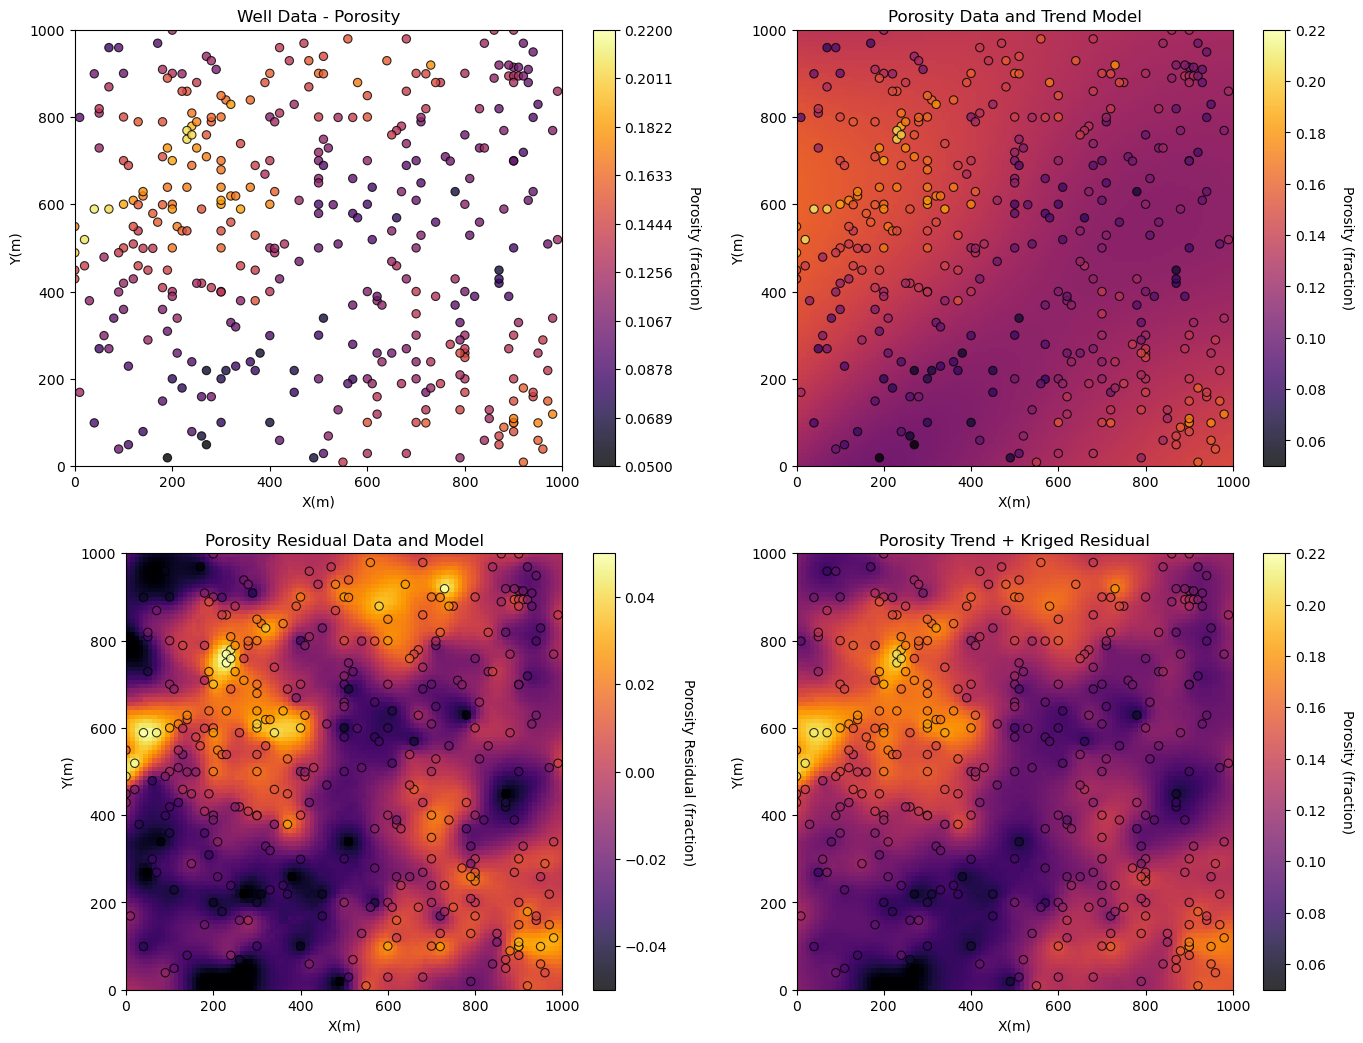

In [25]:
plt.subplot(221)
GSLIB.locmap_st(df,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin,pormax,'Well Data - Porosity','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(222)
GSLIB.locpix_st(porosity_trend,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Data and Trend Model','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplot(223)
GSLIB.locpix_st(res_kmap,xmin,xmax,ymin,ymax,xsiz,-0.05,0.05,df,'X','Y','Por_Res','Porosity Residual Data and Model','X(m)','Y(m)','Porosity Residual (fraction)',cmap)

plt.subplot(224)
GSLIB.locpix_st(por_model,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Trend + Kriged Residual','X(m)','Y(m)','Porosity (fraction)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2., wspace=0.1, hspace=0.2)
plt.show()

#### Let's Compare and Contrast the Stationary Mean 

We add a new kriged map, simple kriging with the declustered porosity average.

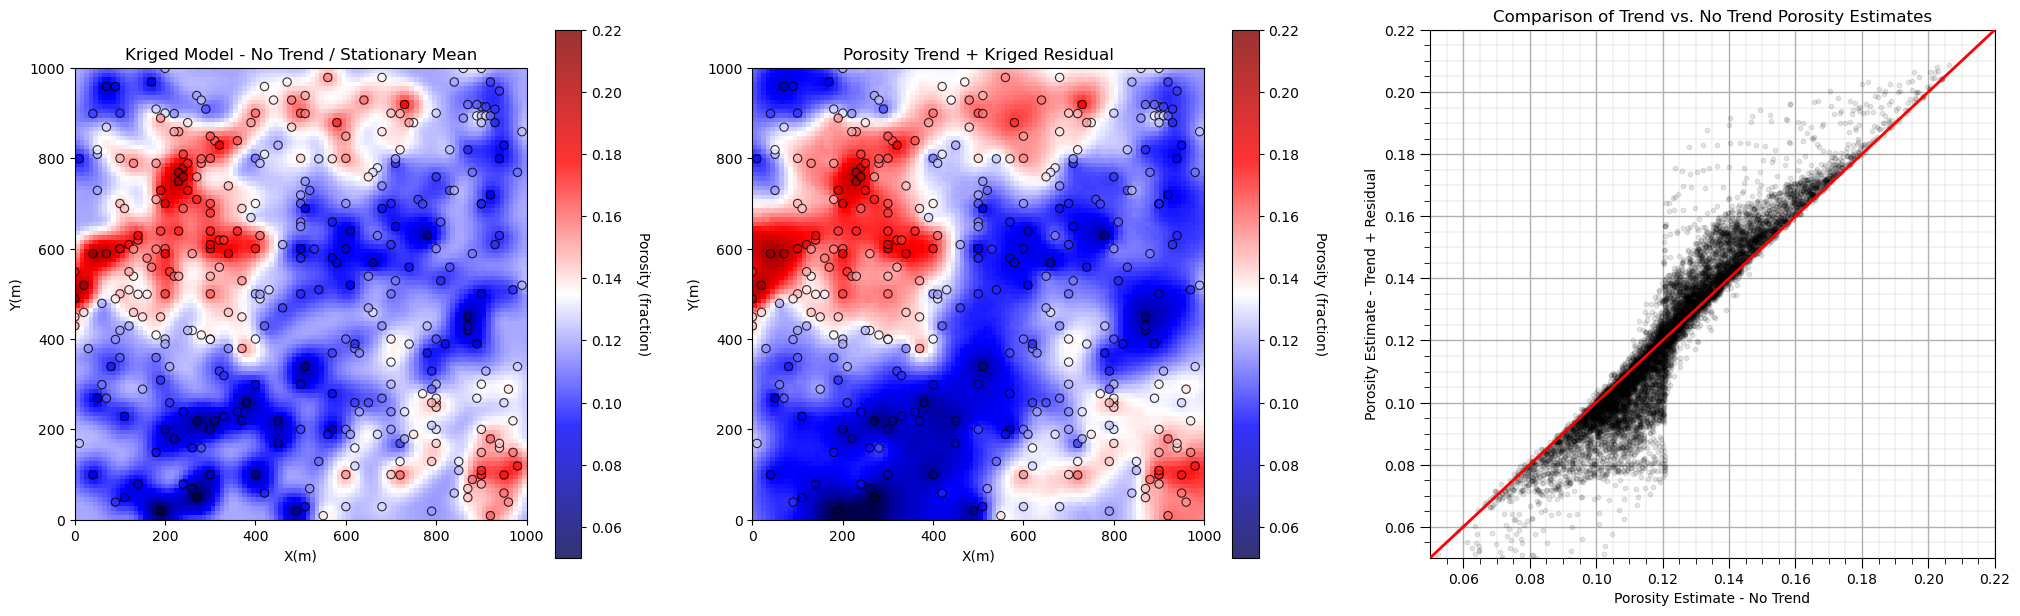

In [26]:
%%capture --no-display     

run = True

vrange = 80.0
por_vario = GSLIB.make_variogram(nug=0.0,nst=1,it1=1.0,cc1=var_resid,azi1=45,hmaj1=vrange,hmin1=vrange) # variogram

if run == True:
    por_kmap, por_vmap = geostats.kb2d(df,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis,nydis,
         ndmin,ndmax,radius,ktype,wavg_por,por_vario)

plt.subplot(131)
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity',
                'Kriged Model - No Trend / Stationary Mean','X(m)','Y(m)',
                'Porosity (fraction)',cmap = plt.cm.seismic)

plt.subplot(132)
GSLIB.locpix_st(por_model,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y',
                'Porosity','Porosity Trend + Kriged Residual','X(m)','Y(m)','Porosity (fraction)',cmap = plt.cm.seismic)

plt.subplot(133)
plt.scatter(por_kmap.flatten(),por_model.flatten(),s=10,color='black',alpha=0.1,edgecolor='black',zorder=5)
add_grid(); plt.xlim([pormin,pormax]); plt.ylim([pormin,pormax]); plt.xlabel('Porosity Estimate - No Trend')
plt.plot([pormin,pormax],[pormin,pormax],color='red',lw=2,zorder=10)
plt.ylabel('Porosity Estimate - Trend + Residual'); plt.title('Comparison of Trend vs. No Trend Porosity Estimates')

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.2)
plt.show()

See how the simple kriging with stationary mean model approaches the global mean away from the data, while the trend + residual kriging approaches the trend model away from the data.

#### Comments

This was a basic demonstration of variogram calculation with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  